# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 16.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
418232,0.3369,0.0024,0.0049,0.0024,0.0024,0.0146,0.1001,0.4224,0.0024,0.0684,3,0,20,0
164427,0.0146,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0806,0.0024,0.0024,6,0,8,0
351758,0.0024,0.0024,0.0024,0.0024,0.0024,0.0098,0.0659,0.0903,0.0024,0.0513,0,0,0,0
146245,1.1157,0.7520,2.1167,0.1196,0.0488,0.1343,0.7104,0.7422,0.2881,0.3394,4,4,6,6
275906,0.1221,0.0024,0.0024,0.0024,0.0024,0.0073,0.0586,0.0952,0.0024,0.0098,4,0,4,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456828 entries, 0 to 456827
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          456828 non-null  float64
 1   Emg2          456828 non-null  float64
 2   Emg3          456828 non-null  float64
 3   Emg4          456828 non-null  float64
 4   Emg5          456828 non-null  float64
 5   Emg6          456828 non-null  float64
 6   Emg7          456828 non-null  float64
 7   Emg8          456828 non-null  float64
 8   Emg9          456828 non-null  float64
 9   Emg10         456828 non-null  float64
 10  repetition    456828 non-null  int64  
 11  rerepetition  456828 non-null  int64  
 12  stimulus      456828 non-null  int64  
 13  restimulus    456828 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.8 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000,456828.000000
mean,0.257678,0.095188,0.119775,0.024560,0.010445,0.027816,0.279186,0.355002,0.052767,0.148996,3.225945,2.036832,5.718159,3.720632
std,0.284347,0.215564,0.396491,0.095231,0.049478,0.072824,0.493694,0.423499,0.179540,0.277385,3.489114,3.183046,6.596319,6.126775
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019500,0.002400,0.002400,0.002400,0.002400,0.002400,0.029300,0.102500,0.002400,0.007300,0.000000,0.000000,0.000000,0.000000
50%,0.178200,0.002400,0.002400,0.002400,0.002400,0.002400,0.117200,0.231900,0.002400,0.053700,2.000000,0.000000,3.000000,0.000000
75%,0.405300,0.058600,0.009800,0.002400,0.002400,0.022000,0.310100,0.434600,0.004900,0.158700,6.000000,4.000000,10.000000,6.000000
max,3.393600,2.702600,4.658200,2.480500,4.660600,2.163100,4.663100,4.665500,3.867200,3.930700,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     188839
8      15501
2      15495
12     15493
4      15490
7      15483
1      15467
6      15464
9      15456
11     15453
5      15449
3      15405
10     15405
14     10334
13     10332
17     10327
15     10285
16     10257
21      5181
18      5170
19      5162
22      5130
20      5125
23      5125
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.897865,-0.492387,-0.34092,-0.266731,-0.184056,-0.372066,-0.567813,-0.740999,-0.321967,-0.557514
1,-0.897865,-0.492387,-0.34092,-0.266731,-0.184056,-0.372066,-0.572360,-0.740999,-0.321967,-0.557514
2,-0.881636,-0.492387,-0.34092,-0.266731,-0.184056,-0.372066,-0.572360,-0.730451,-0.321967,-0.557514
3,-0.873356,-0.492387,-0.34092,-0.266731,-0.184056,-0.372066,-0.567813,-0.735618,-0.321967,-0.557514
4,-0.889585,-0.492387,-0.34092,-0.266731,-0.184056,-0.372066,-0.563448,-0.751547,-0.321967,-0.557514
...,...,...,...,...,...,...,...,...,...,...
352076,0.994348,-0.492387,-0.34092,-0.266731,-0.184056,-0.372066,-0.403579,0.042123,-0.321967,-0.533556
352077,0.768131,-0.492387,-0.34092,-0.266731,-0.184056,-0.372066,-0.377025,-0.052593,-0.321967,-0.518015
352078,0.679035,-0.492387,-0.34092,-0.266731,-0.184056,-0.281628,-0.359201,-0.078854,-0.321967,-0.518015
352079,0.565760,-0.492387,-0.34092,-0.266731,-0.184056,-0.192411,-0.359201,-0.141926,-0.321967,-0.502151


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
70/70 [==============================] - 19s 30ms/step - loss: 1.3455 - accuracy: 0.6481 - val_loss: 1.0299 - val_accuracy: 0.7153
Epoch 2/100
70/70 [==============================] - 2s 26ms/step - loss: 0.9345 - accuracy: 0.7401 - val_loss: 0.8691 - val_accuracy: 0.7595
Epoch 3/100
70/70 [==============================] - 2s 27ms/step - loss: 0.8179 - accuracy: 0.7706 - val_loss: 0.7799 - val_accuracy: 0.7823
Epoch 4/100
70/70 [==============================] - 2s 27ms/step - loss: 0.7471 - accuracy: 0.7883 - val_loss: 0.7088 - val_accuracy: 0.8000
Epoch 5/100
70/70 [==============================] - 2s 29ms/step - loss: 0.6981 - accuracy: 0.8014 - val_loss: 0.6687 - val_accuracy: 0.8104
Epoch 6/100
70/70 [==============================] - 2s 30ms/step - loss: 0.6564 - accuracy: 0.8120 - val_loss: 0.6338 - val_accuracy: 0.8172
Epoch 7/100
70/70 [==============================] - 2s 27ms/step - loss: 0.6290 - accuracy: 0.8195 - val_loss: 0.6142 - val_accuracy: 0.8233
Epoch

70/70 [==============================] - 2s 33ms/step - loss: 0.2784 - accuracy: 0.9170 - val_loss: 0.3296 - val_accuracy: 0.9050
Epoch 59/100
70/70 [==============================] - 2s 32ms/step - loss: 0.2758 - accuracy: 0.9182 - val_loss: 0.3188 - val_accuracy: 0.9076
Epoch 60/100
70/70 [==============================] - 2s 25ms/step - loss: 0.2718 - accuracy: 0.9192 - val_loss: 0.3282 - val_accuracy: 0.9059
Epoch 61/100
70/70 [==============================] - 2s 28ms/step - loss: 0.2695 - accuracy: 0.9198 - val_loss: 0.3128 - val_accuracy: 0.9091
Epoch 62/100
70/70 [==============================] - 2s 36ms/step - loss: 0.2678 - accuracy: 0.9202 - val_loss: 0.3150 - val_accuracy: 0.9084
Epoch 63/100
70/70 [==============================] - 2s 28ms/step - loss: 0.2677 - accuracy: 0.9206 - val_loss: 0.3178 - val_accuracy: 0.9081
Epoch 64/100
70/70 [==============================] - 2s 28ms/step - loss: 0.2606 - accuracy: 0.9224 - val_loss: 0.3078 - val_accuracy: 0.9114
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

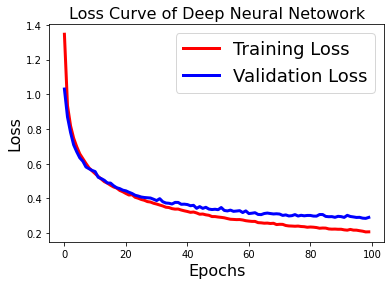

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

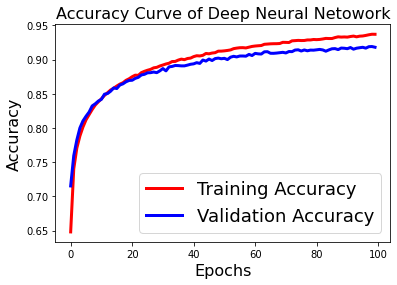

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([15,  0,  0, ...,  0,  0,  0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

9

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 91.80453583651675


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     37336
           1       0.93      0.89      0.91      2041
           2       0.92      0.91      0.91      1801
           3       0.96      0.80      0.88      1808
           4       0.93      0.90      0.92      1649
           5       0.86      0.82      0.84      1852
           6       0.93      0.88      0.91      1782
           7       0.84      0.76      0.80      2039
           8       0.86      0.75      0.80      1792
           9       0.89      0.75      0.81      1670
          10       0.95      0.83      0.89      1657
          11       0.92      0.85      0.88      1863
          12       0.91      0.85      0.88      1955
          13       0.92      0.91      0.91      1339
          14       0.91      0.75      0.82      1283
          15       0.93      0.88      0.90      1165
          16       0.93      0.93      0.93      1370
 

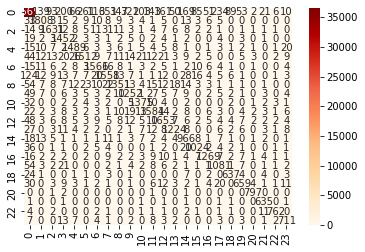

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.6760299359529659
MSE: 7.720209608475226
RMSE: 2.7785265175044174


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9177455683875664
Recall Score :  0.9180453583651675
f1_score :  0.9163952696238719
